In [1]:
import numpy as np
import matplotlib.pyplot  as  plt
from matplotlib.ticker import MaxNLocator
from scipy.special import binom

In [2]:
fparams =  {'xtick.labelsize': 20,
            'ytick.labelsize': 20,
            'axes.labelsize': 20,
            'axes.titlesize': 20,
            'font.size': 20,
            'legend.fontsize': 18,
            'text.usetex': True,
            'legend.frameon' : False,
            'svg.fonttype': 'path'}
plt.rcParams.update(fparams)

In [3]:
def pb(k, b, n):
    f = np.exp(-b * k) / (1. + np.exp(-b)) ** n * binom(n, k)
    return f

In [4]:
num = [4, 5, 6, 7, 8]
print(num)
print(len(num))
nr = 40 # -- number of realizations
time = np.load('data/time.npy', allow_pickle = True)

p = {}
pav = {}
S = {}
SS2 = {}
Sav = {}
S2av = {}
VarS = {}

for n in range(len(num)):
    p[n] = np.load('data/p={}_nr={}.npy'.format(num[n], nr), allow_pickle = True)
    pav[n] = np.load('data/pav={}_nr={}.npy'.format(num[n], nr), allow_pickle = True)
    S[n] = np.load('data/S_N={}_nr={}.npy'.format(num[n], nr), allow_pickle = True)
    SS2[n] = np.load('data/SS2_N={}_nr={}.npy'.format(num[n], nr), allow_pickle = True)
    Sav[n] = np.load('data/Sav_N={}_nr={}.npy'.format(num[n], nr), allow_pickle = True)
    S2av[n] = np.load('data/S2av_N={}_nr={}.npy'.format(num[n], nr), allow_pickle = True)
    VarS[n] = np.load('data/VarS_N={}_nr={}.npy'.format(num[n], nr), allow_pickle = True)

[4, 5, 6, 7, 8]
5


In [6]:
dt_ind = 20
ones_arr = np.array([1 for i in range(len(time))])
print(time[dt_ind])

S_erg = {}
VarS_erg = {}
beta = {}

for n in range(len(num)):
    S_eq = Sav[n][dt_ind:]
    S_erg_v = np.sum(S_eq) / len(S_eq)
    S_erg[n] = S_erg_v * ones_arr
    VarS_erg_v = np.sum(S2av[n][dt_ind:]) / len(S_eq) - (S_erg_v + num[n] / 2) **2
    VarS_erg[n] = VarS_erg_v * ones_arr
    beta[n] = np.arcsinh( - S_erg_v / VarS_erg_v)
    print(beta[n])

1.0
1.487881129272365
1.0980558955480921
0.8437779698787049
0.7346872085033457
0.6240138714108975


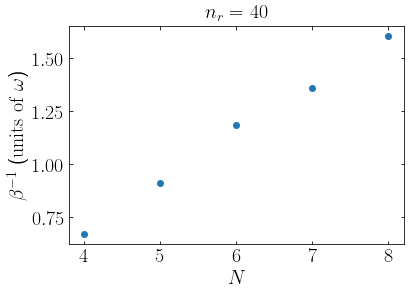

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$N$')
ax.set_ylabel(r'$\beta^{-1}$ ({\rm units of} $\omega$)')
ax.set_title(r'$n_r = $'+' ${}$'.format(nr))
for n in range(len(num)):
    ax.plot(num[n], 1. / beta[n],  'o', color = 'tab:blue')
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/T_nr={}.svg'.format(nr))

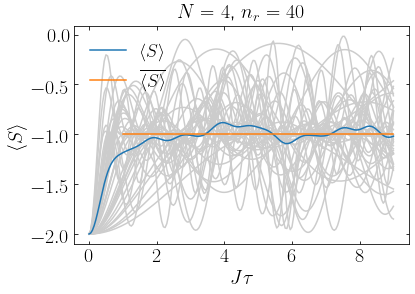

In [8]:
num_ind = 0
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.plot(time[dt_ind:], S_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S \rangle}$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}.svg'.format(num, nr))

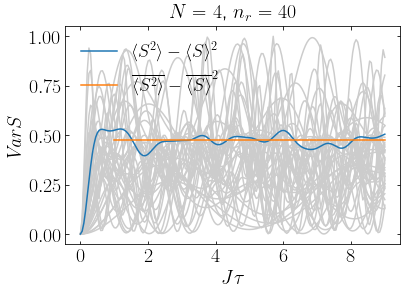

In [9]:
num_ind = 0
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.plot(time[dt_ind:], VarS_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S^2 \rangle} - \overline{\langle S \rangle}^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}.svg'.format(num, nr))

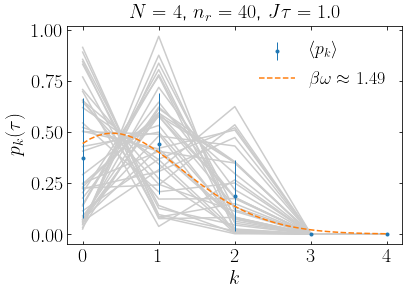

In [10]:
num_ind = 0
t_ind = 20
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr + 1, elinewidth=1, label = r'$\langle p_k \rangle$') 
qs = np.linspace(0, num[num_ind], 41)
ax.plot(qs, pb(qs, beta[num_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 2, label = r'$\beta \omega \approx $'+' ${}$'.format(round(beta[num_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_tau={}.svg'.format(num, nr, time[t_ind]))

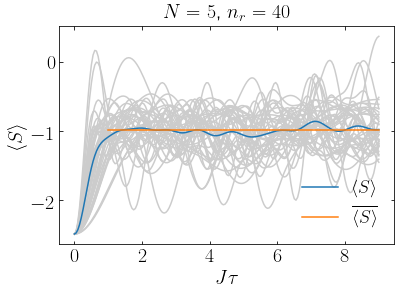

In [11]:
num_ind = 1
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.plot(time[dt_ind:], S_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S \rangle}$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}.svg'.format(num, nr))

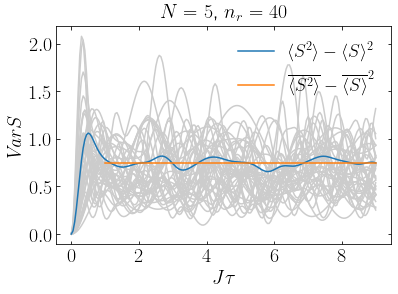

In [12]:
num_ind = 1
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.plot(time[dt_ind:], VarS_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S^2 \rangle} - \overline{\langle S \rangle}^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}.svg'.format(num, nr))

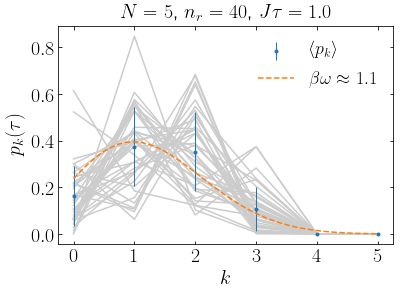

In [13]:
num_ind = 1
t_ind = 20
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr + 1, elinewidth=1, label = r'$\langle p_k \rangle$') 
qs = np.linspace(0, num[num_ind], 41)
ax.plot(qs, pb(qs, beta[num_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 2, label = r'$\beta \omega \approx $'+' ${}$'.format(round(beta[num_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_tau={}.svg'.format(num, nr, time[t_ind]))

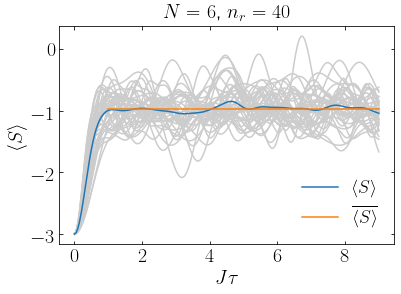

In [14]:
num_ind = 2
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.plot(time[dt_ind:], S_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S \rangle}$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}.svg'.format(num, nr))

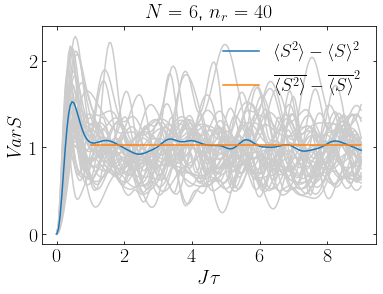

In [15]:
num_ind = 2
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.plot(time[dt_ind:], VarS_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S^2 \rangle} - \overline{\langle S \rangle}^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}.svg'.format(num, nr))

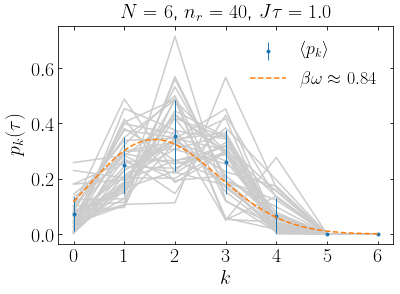

In [16]:
num_ind = 2
t_ind = 20
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr + 1, elinewidth=1, label = r'$\langle p_k \rangle$') 
qs = np.linspace(0, num[num_ind], 41)
ax.plot(qs, pb(qs, beta[num_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 2, label = r'$\beta \omega \approx $'+' ${}$'.format(round(beta[num_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_tau={}.svg'.format(num, nr, time[t_ind]))

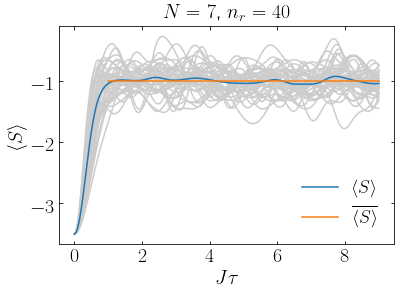

In [17]:
num_ind = 3
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.plot(time[dt_ind:], S_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S \rangle}$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}.svg'.format(num, nr))

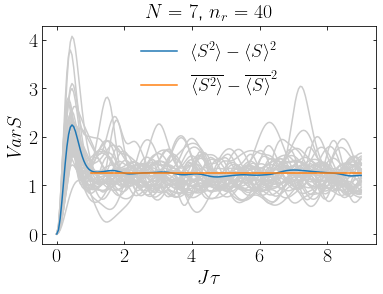

In [18]:
num_ind = 3
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.plot(time[dt_ind:], VarS_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S^2 \rangle} - \overline{\langle S \rangle}^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}.svg'.format(num, nr))

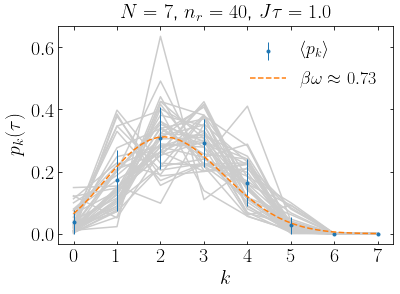

In [19]:
num_ind = 3
t_ind = 20
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr + 1, elinewidth=1, label = r'$\langle p_k \rangle$') 
qs = np.linspace(0, num[num_ind], 41)
ax.plot(qs, pb(qs, beta[num_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 2, label = r'$\beta \omega \approx $'+' ${}$'.format(round(beta[num_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_tau={}.svg'.format(num, nr, time[t_ind]))

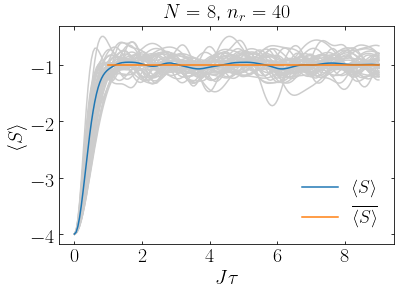

In [20]:
num_ind = 4
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'$\langle S \rangle$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(S[num_ind])[j], color='0.8')
ax.plot(time, Sav[num_ind],  '-', label = r'$\langle S \rangle$')
ax.plot(time[dt_ind:], S_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S \rangle}$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/S_N={}_nr={}.svg'.format(num, nr))

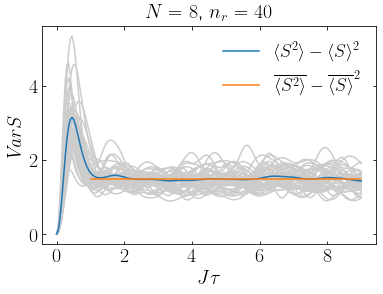

In [21]:
num_ind = 4
fig, ax = plt.subplots()
ax.set_xlabel(r'$J \tau$')
ax.set_ylabel(r'${\it Var}  S$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$'.format(nr))
for j in range(nr):
    ax.plot(time, np.transpose(SS2[num_ind])[j], color='0.8')
ax.plot(time, VarS[num_ind],  '-', label = r'$\langle S^2 \rangle - \langle S \rangle^2$')
ax.plot(time[dt_ind:], VarS_erg[num_ind][dt_ind:],  '-', label = r'$\overline{\langle S^2 \rangle} - \overline{\langle S \rangle}^2$')
ax.legend()
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
#plt.savefig('figs/VarS_N={}_nr={}.svg'.format(num, nr))

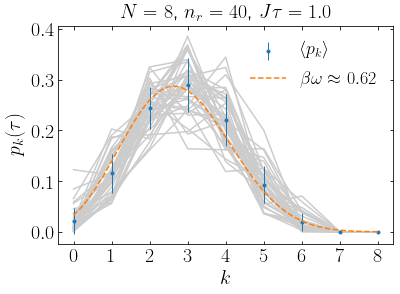

In [23]:
num_ind = 4
t_ind = 20
keys = np.linspace(0, num[num_ind], num[num_ind]+1)
fig, ax = plt.subplots()
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$p_k(\tau)$')
ax.set_title(r'$N = $'+' ${}$, '.format(num[num_ind])+r'$n_r = $'+' ${}$, '.format(nr)+r'$J \tau = $'+' ${}$'.format(time[t_ind]))
for j in range(nr):
    ax.plot(keys, p[num_ind][t_ind][j], color='0.8', zorder = j)    
ax.errorbar(keys, pav[num_ind][t_ind], yerr = np.std(p[num_ind][t_ind], 0), color = 'tab:blue', barsabove = True, fmt = '.', zorder = nr + 1, elinewidth=1, label = r'$\langle p_k \rangle$') 
qs = np.linspace(0, num[num_ind], 41)
ax.plot(qs, pb(qs, beta[num_ind], num[num_ind]),  '--', color = 'tab:orange', zorder = nr + 2, label = r'$\beta \omega \approx $'+' ${}$'.format(round(beta[num_ind],2)))
ax.tick_params(which='major', direction="in", top = "True", right = "True"); 
ax.tick_params(which='minor', direction="in")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
handles, labels = plt.gca().get_legend_handles_labels()
handles.reverse()
labels.reverse()
ax.legend([handles[i] for i in range(2)], [labels[i] for i in range(2)])
#plt.savefig('figs/pk_N={}_nr={}_tau={}.svg'.format(num, nr, time[t_ind]))